In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from textblob import Word, TextBlob
from warnings import filterwarnings

filterwarnings('ignore')
pd.set_option('display.max_columns', 1_000)
pd.set_option('display.float_format', lambda x: '%.2f' %x)
pd.set_option('display.width', 500)

In [2]:
df = pd.read_csv('wiki_data.csv', index_col=0)
df.head()

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [3]:
df = df[:2000]
df.head()

,text
1,Anovo\n\nAnovo (formerly A Novo) is a computer...
2,Battery indicator\n\nA battery indicator (also...
3,"Bob Pease\n\nRobert Allen Pease (August 22, 19..."
4,CAVNET\n\nCAVNET was a secure military forum w...
5,CLidar\n\nThe CLidar is a scientific instrumen...


In [4]:
df.shape

(2000, 1)

In [5]:
def clean_text(text):
    '''Changes letters to lower case, and cleans punctuation characters and numbers.'''
    text = text.str.lower()
    text = text.str.replace(r'[^\w\s]', '')
    text = text.str.replace(r'\d+\.\d+', '', regex=True)
    text = text.str.replace('\n', '')
    text = text.str.replace('\d+', '')
    return text

In [6]:
df['text'] = clean_text(df['text'])

In [7]:
df['text'].head()

1    anovoanovo (formerly a novo) is a computer ser...
2    battery indicatora battery indicator (also kno...
3    bob peaserobert allen pease (august 22, 1940â ...
4    cavnetcavnet was a secure military forum which...
5    clidarthe clidar is a scientific instrument us...
Name: text, dtype: object

In [8]:
def remove_stopwords(text):
    stop_words = stopwords.words('english')
    text = text.apply(lambda x: ' '.join(x for x in str(x).split() if x not in stop_words))
    return text

In [9]:
df['text'] = remove_stopwords(df['text'])

In [10]:
# least frequent words

to_delete = pd.Series(' '.join(df['text']).split()).value_counts()[-1000:]
df['text'] = df['text'].apply(lambda x: ' '.join(x for x in x.split() if x not in to_delete))

In [11]:
df['text'].apply(lambda x: TextBlob(x).words)

1       [anovoanovo, formerly, novo, computer, service...
2       [battery, indicatora, battery, indicator, also...
3       [bob, peaserobert, allen, pease, august, 22, 1...
4       [cavnetcavnet, secure, military, forum, became...
5       [clidarthe, clidar, scientific, instrument, us...
                              ...                        
1996    [edinburgh, calotype, clubthe, edinburgh, calo...
1997    [endrinendrin, organochloride, chemical, formu...
1998    [ethylene, glycol, dinitrateethylene, glycol, ...
1999    [forges, de, syamthe, forges, de, syam, syam, ...
2000    [frank-kamenetskii, theoryin, combustion, fran...
Name: text, Length: 2000, dtype: object

In [12]:
df['text'] = df['text'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x.split()]))

df.head()

,text
1,anovoanovo (formerly novo) computer service co...
2,battery indicatora battery indicator (also kno...
3,"bob peaserobert allen pea (august 22, 1940â â€..."
4,cavnetcavnet secure military forum became oper...
5,clidarthe clidar scientific instrument used me...


In [13]:
tf = df['text'].apply(lambda x: pd.value_counts(x.split(' '))).sum(axis=0).reset_index()

tf.head()

,index,0
0,company,1862.00
1,anovoanovo,1.00
2,10,248.00
3,four,473.00
4,year,907.00


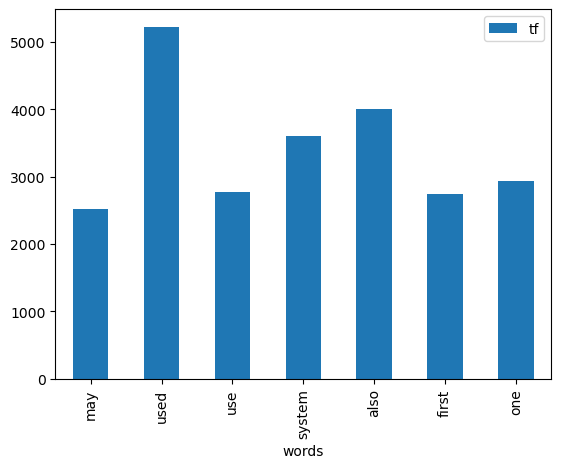

In [14]:
tf.columns = ['words', 'tf']

tf[tf['tf'] > 2000].plot.bar(x='words', y='tf')
plt.show()

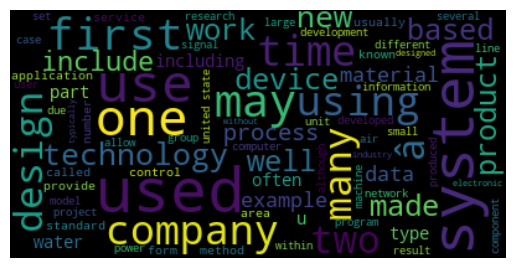

In [15]:
text = ' '.join(word for word in df['text'])

wordcloud = WordCloud(max_font_size=50, max_words=80, background_color='black').generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()